### Step 1: Importing the necessary libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from PIL import Image
import cv2

### Step 2: Plotting the histograms

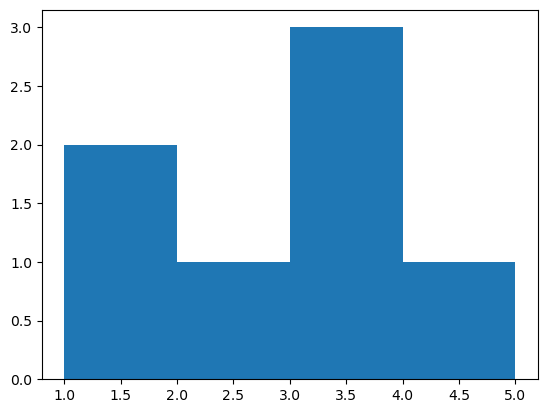

In [2]:
# Use pyplot to plot the histogram
values = [1.1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
plt.hist(values, bins = 4, range = (1,5))
plt.show()


### Step 3: Plotting weighted histograms

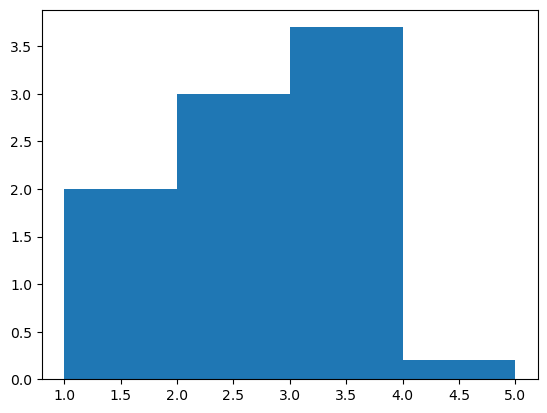

In [3]:
# Plot the weighted histograms
weights = [1., 1., 3., 1.2, 1.4, 1.1, 0.2]
plt.hist(values, bins = 4, range = (1,5), weights = weights)
plt.show()

### Step 4: Preparing an array to demonstrate HoG

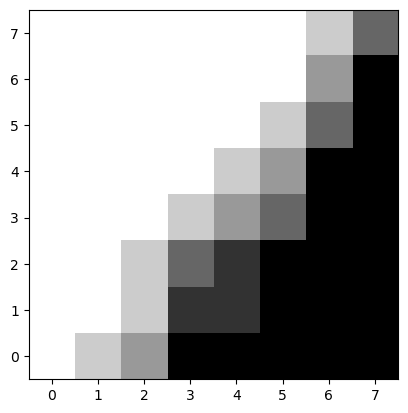

In [4]:
# Prepare the image to demonstrate HOG
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 2, 5],
    [0, 0, 0, 0, 0, 0, 1, 3],
    ],dtype='float64')
plt.imshow(cell, cmap = 'binary', origin = 'lower')
plt.show()

### Step 5: Calculating Histograms of Oriented Gradients (HOG)

In [5]:
# Calculate the histograms of oriented gradients
gradx = cv2.Sobel(cell, cv2.CV_64F, 1, 0, ksize = 1)
grady = cv2.Sobel(cell, cv2.CV_64F, 0, 1, ksize = 1)

norm, angle = cv2.cartToPolar(gradx, grady, angleInDegrees = True)


### Step 6: Plotting the norm and showing the magnitude

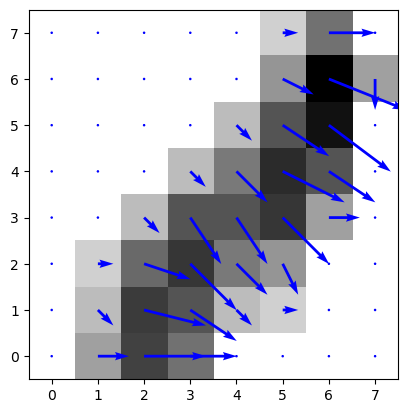

In [6]:
# Plotting the norm and showing the magnitude
plt.imshow(norm, cmap = 'binary', origin = 'lower')

q = plt.quiver(gradx, grady, color = 'blue')
plt.show()

### Step 7: Plotting HOG using pyplot

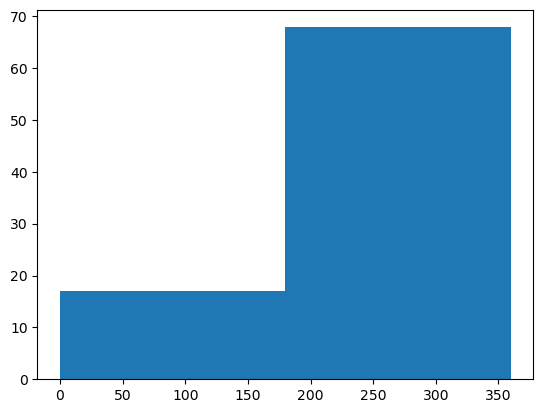

In [7]:
# Plot HOG values using pyplot
plt.hist(angle.reshape(-1), weights = norm.reshape(-1), bins = 2, range=(0,360))
plt.show()

### Step 8: Loading detector

In [8]:
# Load the HOG based human detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

### Step 9: Loading the video and reading the frame

In [9]:
# Load the video from given path and read a frame using cv
videoPath = 'video.mp4'
cap = cv2.VideoCapture(videoPath)

ret = True

# read frame-by-frame
ret, frame = cap.read()

### Step 10: Detecting the pedestrian

In [10]:
# Detect the pedestrian 
# Resizing for faster detection
frame = cv2.resize(frame, (640, 480))

# Using a grayscale picture, also for faster detection
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
 
# Detect pople in the image
# Returns the bounding boxes for the the detected objects
boxes,  weights = hog.detectMultiScale(frame, winStride = (8,8))

### Step 11: Labelling and visualizing the image with detected boxes

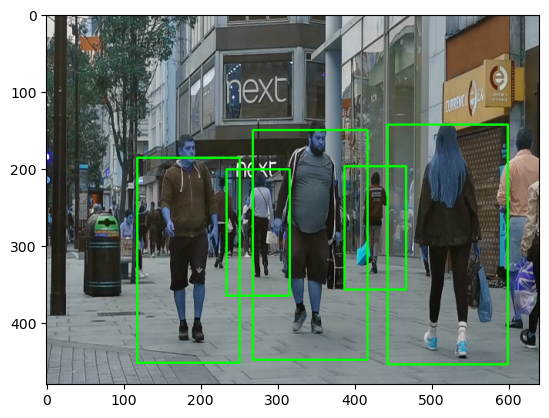

In [11]:
# Draw the boxes on the image and visualize it
boxes = np.array([[x, y, x+w, y+h] for (x,y,w,h) in boxes])

for(xA, yA, xB, yB) in boxes:
    # Dispaly the detected boxes in the colour picture
    cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
frame = Image.fromarray(frame)
plt.imshow(frame)

### Step 12: Looping over previous steps

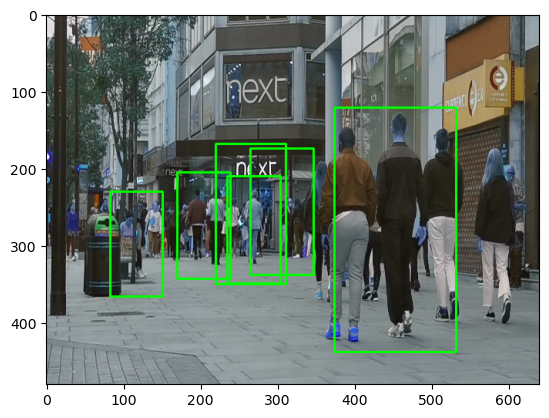

In [ ]:
# Examine the whole video for pedestrians

while(ret):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Resizing for faster detection
    frame = cv2.resize(frame, (640, 480))
    # Using a greyscale picture, also for faster detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Detect people in the image
    # Deturns the bounding boxes for the detected objects
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # Display the detected boxes in the colour picture
        cv2.rectangle(frame, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    frame = Image.fromarray(frame)
    plt.imshow(frame)
    display.clear_output(wait=True)
    display.display(plt.gcf())

# When everything is done, release the capture
cap.release()
